In [1]:
import rishi_utils as ru
from rdkit import Chem
import fall20_mse_8803 as retro
import importlib
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
importlib.reload(retro)
importlib.reload(ru)
import numpy as np
import pickle
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 600

Restored variables from /data/rgur/retrosynthesis/scscore/models/full_reaxys_model_1024uint8/model.ckpt-10654.as_numpy.json.gz
Restored variables from /data/rgur/retrosynthesis/scscore/models/full_reaxys_model_1024uint8/model.ckpt-10654.as_numpy.json.gz


# Make ring-closing rxn

In [46]:
importlib.reload(ru)

<module 'rishi_utils' from '/home/rgur/py_scripts/rishi_utils.py'>

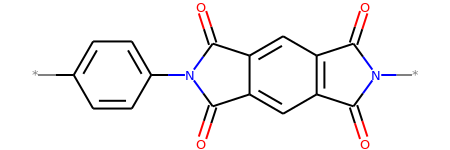

In [47]:
mol = Chem.MolFromSmiles('*c4ccc(n3c(=O)c2cc1c(=O)n(*)c(=O)c1cc2c3=O)cc4')
mol

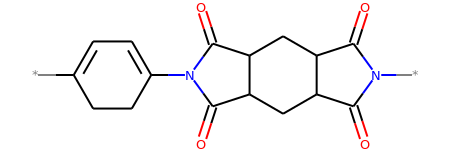

In [48]:
mol2 = Chem.MolFromSmiles('*c4ccc(N3C(=O)C2CC1C(=O)N(*)C(=O)C1CC2C3=O)CC4')
mol2

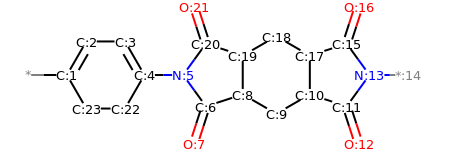

In [49]:
ru.mol_with_atom_index(mol2)

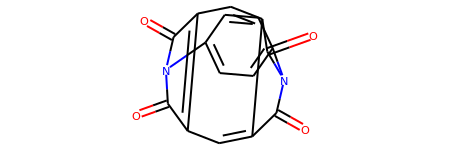

In [138]:
lp = ru.LinearPol(mol)
pm = lp.PeriodicMol()
pm.GetSSSR()
pm.mol

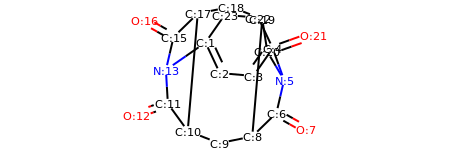

In [52]:
lp2 = ru.LinearPol(mol2)
pm2 = lp2.PeriodicMol()
pm2.GetSSSR()
pm2.mol

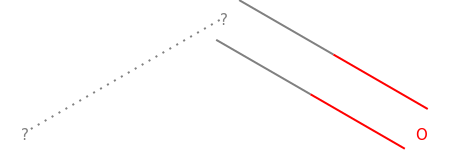

In [147]:
start_match = Chem.MolFromSmarts('[cR,CR](=O)[nR,NR]') #the ring we want to break
start_match

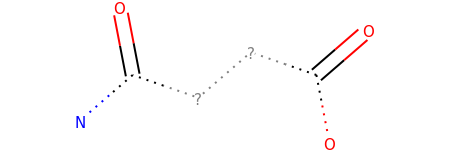

In [56]:
end_match = Chem.MolFromSmarts('[#6R0](=O)([OH])[C,c][C,c][CR1](=O)[NR1]') #the group we want to end up with
end_match

In [57]:
pm.HasSubstructMatch(start_match),pm2.HasSubstructMatch(start_match)  #should be True, True

(True, True)

In [58]:
pm.mol.HasSubstructMatch(end_match),pm2.mol.HasSubstructMatch(end_match)  #should be False, False

(False, False)

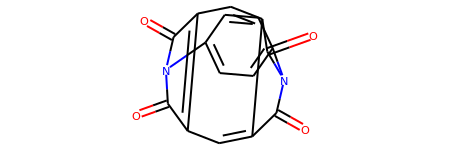

In [59]:
pm.mol

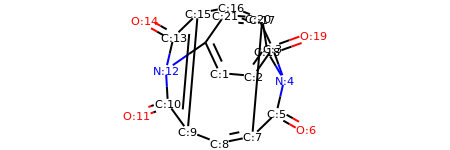

In [63]:
ru.mol_with_atom_index(pm.mol)

In [96]:
ri = pm.GetRingInfo()
ar = ri.AtomRings()

In [101]:
ring_idx = None
ring_size = 100
for i in range(len(ar)):
    ring = ar[i]
    if 10 in ring and 12 in ring and len(ring) < ring_size: #assume correct ring is the smallest one
        ring_idx = i
        ring_size = len(ring)
ring_idx

1

In [85]:
ring_idx = 1

In [121]:
ring_atoms = ar[ring_idx]
ring_atoms

(10, 9, 15, 13, 12)

In [93]:
ring_bonds = pm.GetRingInfo().BondRings()[ring_idx]
ring_bonds

(9, 21, 14, 12, 11)

In [95]:
atom_pairs = []
for bond_idx in ring_bonds:
    b = pm.mol.GetBondWithIdx(bond_idx)
    atom_pairs.append( (b.GetBeginAtomIdx(),b.GetEndAtomIdx()) )
atom_pairs

[(9, 10), (15, 9), (13, 15), (12, 13), (10, 12)]

In [117]:
a=pm.mol.GetAtomWithIdx(9)

In [122]:
for i in ring_atoms:
    pm.mol.GetAtomWithIdx(i).SetIsAromatic(False)

RDKit ERROR: [16:10:59] Aromatic bonds on non aromatic atom 9


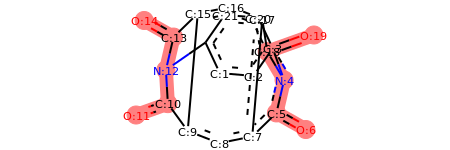

In [123]:
pm.mol

In [ ]:
pm.mol.GetAtomWithIdx(9)

In [88]:
pm.mol.GetBondBetweenAtoms(9,15).GetBondType()

rdkit.Chem.rdchem.BondType.SINGLE

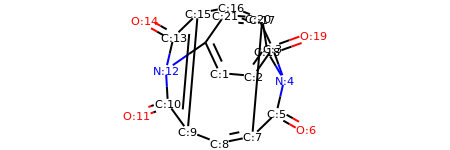

In [89]:
pm.mol

In [84]:
Chem.SanitizeMol(pm.mol)
pm.mol.GetBondBetweenAtoms(9,15).GetBondType()

rdkit.Chem.rdchem.BondType.AROMATIC

In [67]:
b.SetBondType(Chem.BondType.SINGLE)

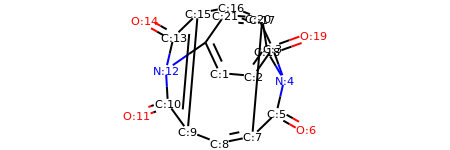

In [70]:
pm.mol

In [ ]:
ri = pm.GetRingInfo

In [139]:
ar_atom = pm.mol.GetAromaticAtoms()[0]

In [140]:
ar_atom_idx = [a.GetIdx() for a in pm.mol.GetAromaticAtoms()]
ar_atom_idx

[0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 12, 13, 15, 16, 17, 18, 20, 21]

In [143]:
atom_aromaticity = {a:0 for a in ar_atom_idx}
atom_aromaticity

{0: 0,
 1: 0,
 2: 0,
 3: 0,
 4: 0,
 5: 0,
 7: 0,
 8: 0,
 9: 0,
 10: 0,
 12: 0,
 13: 0,
 15: 0,
 16: 0,
 17: 0,
 18: 0,
 20: 0,
 21: 0}

In [148]:
ar

((5, 4, 18, 17, 7),
 (10, 9, 15, 13, 12),
 (1, 2, 3, 20, 21, 0),
 (8, 9, 15, 16, 17, 7),
 (1, 0, 12, 10, 9, 8, 7, 5, 4, 3, 2),
 (1, 0, 12, 13, 15, 16, 17, 18, 4, 3, 2),
 (20, 3, 4, 5, 7, 8, 9, 10, 12, 0, 21),
 (20, 3, 4, 18, 17, 16, 15, 13, 12, 0, 21))

In [144]:

for ring in ar:
    if ring[0] in ar_atom_idx:
        for a in ring:
            atom_aromaticity[a] += 1
atom_aromaticity

{0: 5,
 1: 3,
 2: 3,
 3: 5,
 4: 5,
 5: 3,
 7: 4,
 8: 3,
 9: 4,
 10: 3,
 12: 5,
 13: 3,
 15: 4,
 16: 3,
 17: 4,
 18: 3,
 20: 3,
 21: 3}

In [157]:
np.array(lp_no_connect_inds)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 15, 16, 17, 18,
       19, 20, 21, 22, 23])

In [158]:
np.argwhere(np.array(lp_no_connect_inds)==4)

array([[3]])

In [204]:
import itertools

#works for non-aromatic systems
lps = []
fix_aromaticity = False
#pm_inds = list(range(0,pm.GetNumAtoms()))
lp_no_connect_inds = np.array([x for x in range(lp.mol.GetNumAtoms()) if x not in lp.star_inds])
def lp_to_pm_ind(lp_ind):
    return int(np.argwhere(lp_no_connect_inds==lp_ind))

ri = lp.mol.GetRingInfo()
ar = ri.AtomRings()
ar_atom_idx = [a.GetIdx() for a in lp.mol.GetAromaticAtoms()]
atom_aromaticity = {a:0 for a in ar_atom_idx}

for ring in ar:
    if ring[0] in ar_atom_idx:
        for a in ring:
            atom_aromaticity[a] += 1

if pm.mol.HasSubstructMatch(start_match) and not pm.mol.HasSubstructMatch(end_match): 
    matches = pm.mol.GetSubstructMatches(start_match)
    #for L in range(1, len(matches)+1):
    for L in range(1,2):
        for match_combo in itertools.combinations(matches,L):
            em = Chem.EditableMol(pm.mol)
            #print(match_combo)
            for i_c,i_o,i_n in match_combo: #indices of atoms in pm
                #print(pm.mol.GetBondBetweenAtoms(i_c,i_n).GetBondType())
                if pm.mol.GetBondBetweenAtoms(i_c,i_n).GetBondType() == Chem.BondType.AROMATIC:
                    fix_aromaticity = True
                    ring_atoms = None
                    ring_size = 100
                    for i in range(len(ar)):
                        ring = ar[i]
                        if lp_no_connect_inds[i_c] in ring and lp_no_connect_inds[i_n] in ring and len(ring) < ring_size: #assume correct ring is the smallest one
                            ring_atoms = set(ring)
                            ring_size = len(ring)
                
                em.GetMol()
                em.RemoveBond(i_c,i_n)

                o=em.AddAtom(Chem.AtomFromSmiles('O'))
                em.AddBond(i_c,o,Chem.BondType.SINGLE)

                med_mol = em.GetMol()
                if fix_aromaticity:
                    i_n_aromaticity = atom_aromaticity[ lp_to_pm_ind(i_n) ]
                    for i in ring_atoms:
                        if atom_aromaticity[ i ] == i_n_aromaticity: #if an atom was part of same number of aromatic rings as the N atom, it shouldn't be aromatic
                            print(i)
                            med_mol.GetAtomWithIdx( lp_to_pm_ind(i) ).SetIsAromatic(False)
                    fix_aromaticity = False #set flag back to False
            
            em = Chem.EditableMol(med_mol)
            star1 = em.AddAtom(Chem.AtomFromSmiles('*'))
            star2 = em.AddAtom(Chem.AtomFromSmiles('*'))
            em.RemoveBond(pm.connector_inds[0],pm.connector_inds[1])
            em.AddBond(pm.connector_inds[0],star1,Chem.BondType.SINGLE)
            em.AddBond(pm.connector_inds[1],star2,Chem.BondType.SINGLE)

            new_mol=em.GetMol()           
            print('#########')
            try:
                Chem.SanitizeMol(new_mol)
                lps.append( ru.LinearPol( ru.mol_without_atom_index(new_mol) ) )
            except:
                pass
else:
    print('None')

5
6
20
#########
11
13
15
#########
11
13
15
#########
5
6
20
#########
RDKit ERROR: [19:33:22] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding call to calcImplicitValence()
RDKit ERROR: Violation occurred on line 153 in file /home/conda/feedstock_root/build_artifacts/rdkit_1540561308834/work/Code/GraphMol/Atom.cpp
RDKit ERROR: Failed Expression: d_implicitValence > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [19:34:04] Explicit valence for atom # 5 C, 5, is greater than permitted
RDKit ERROR: [19:34:04] Explicit valence for atom # 10 C, 5, is greater than permitted
RDKit ERROR: [19:34:04] Explicit valence for atom # 10 C, 5, is greater than permitted
RDKit ERROR: [19:34:04] Explicit valence for atom # 5 C, 5, is greater than permitted


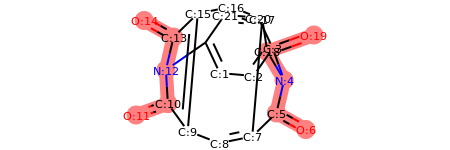

In [205]:
ru.mol_with_atom_index(pm.mol)

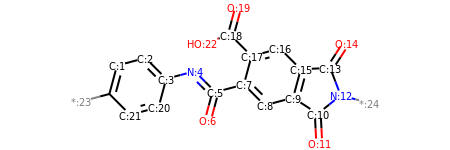

In [206]:
ru.mol_with_atom_index(new_mol)

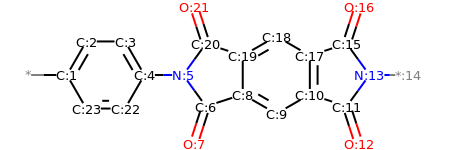

In [207]:
ru.mol_with_atom_index(lp.mol)

In [191]:
lps

[]

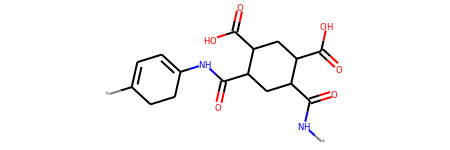

In [15]:
intermed = lps[4] 
intermed.mol

In [18]:
importlib.reload(retro)
retro.retrosynthesize([lps[4].SMILES],ro=False,radion=False,ox=False)

Restored variables from /data/rgur/retrosynthesis/scscore/models/full_reaxys_model_1024uint8/model.ckpt-10654.as_numpy.json.gz


[]

Restored variables from /data/rgur/retrosynthesis/scscore/models/full_reaxys_model_1024uint8/model.ckpt-10654.as_numpy.json.gz


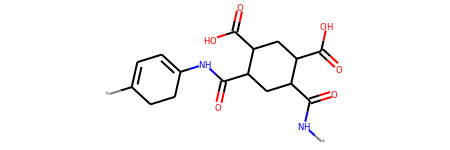

In [19]:
importlib.reload(retro)
retro.ring_close_retro(lp2)[4].mol

# Do step-growth reaction nh2_xox_edit

In [20]:
mol = intermed.mol #from above

In [21]:
g1,g2 = Chem.MolFromSmarts('[NH2]'),Chem.MolFromSmarts('*O*')

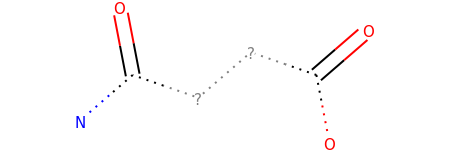

In [22]:
polymer_linkage = Chem.MolFromSmarts('[#6R0](=O)([OH])[C,c][C,c][CR1](=O)[NR1]')
polymer_linkage

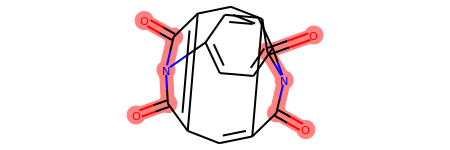

In [23]:
pm.mol

In [24]:
if type(mol) == str:
    mol = Chem.MolFromSmiles(mol)

lp = ru.LinearPol(mol)
pm = lp.PeriodicMol()
pm.GetSSSR()
if pm is None: #periodization failed
    #return None
    print('None1')
try: #sometimes g1 and g2 are given as lists. If so they will fail below.
    if pm.HasSubstructMatch(g1) or pm.HasSubstructMatch(g2): #chain should not have same functional groups we want to react
        if edit_function != nh_nco_edit: #but there are exceptions
            print('None2')
    g1 = [g1] #do this so symmetry check will have an iterable
    g2 = [g2] #do this so symmetry check will have an iterable
except:
    if any([pm.HasSubstructMatch(x) for x in g1] + [pm.HasSubstructMatch(x) for x in g2]): #chain should not have same functional groups we want to react
        if edit_function != nh_nco_edit: #but there are exceptions
            print('None3')      
matches=pm.GetSubstructMatches(polymer_linkage)
match_pairs = list(itertools.combinations(matches, 2))
new_mols = []

In [25]:
match_pair = match_pairs[0]

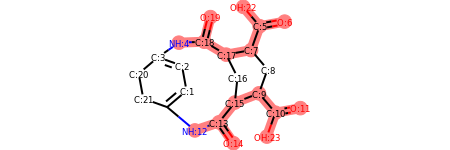

In [26]:
ru.mol_with_atom_index(pm.mol)

In [27]:
match_pair

((5, 6, 22, 7, 17, 18, 19, 4), (10, 11, 23, 9, 15, 13, 14, 12))

In [28]:
'[#6R0](=O)([OH])[C,c][C,c][CR1](=O)[NR1]'

'[#6R0](=O)([OH])[C,c][C,c][CR1](=O)[NR1]'

In [29]:
_,_,a_ioh,a_ic1,a_ic2,a_ico,_,a_in = match_pair[0]
_,_,b_ioh,b_ic1,b_ic2,b_ico,_,b_in = match_pair[1]

In [30]:
bond_type = pm.mol.GetBondBetweenAtoms(a_ic1,a_ic2).GetBondType()
bond_type

rdkit.Chem.rdchem.BondType.SINGLE

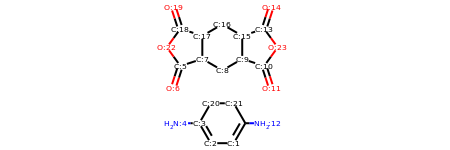

In [33]:
em = Chem.EditableMol(pm.mol)
em.RemoveBond(a_ico,a_in)
em.RemoveBond(b_ico,b_in)

em.AddBond(a_ico,a_ioh,bond_type)
em.AddBond(b_ico,b_ioh,bond_type)

new_mol=em.GetMol()
Chem.SanitizeMol(new_mol)
new_mol

Restored variables from /data/rgur/retrosynthesis/scscore/models/full_reaxys_model_1024uint8/model.ckpt-10654.as_numpy.json.gz


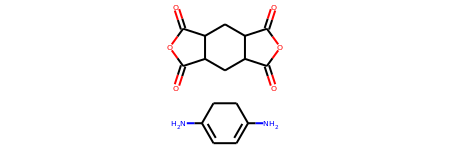

In [38]:
importlib.reload(retro)
retro.sg_depolymerize(mol,polymer_linkage,retro.sg_rxns['[#6R0](=O)([OH])[C,c][C,c][CR1](=O)[NR1]'][0])[0]

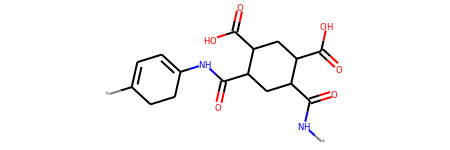

In [42]:
mol

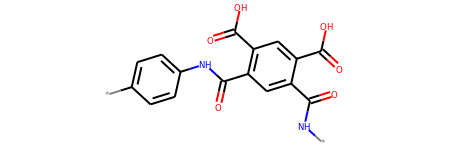

In [41]:
mol2 = Chem.MolFromSmiles('*NC(=O)c2cc(C(=O)Nc1ccc(*)cc1)c(C(=O)O)cc2C(=O)O')
mol2

Restored variables from /data/rgur/retrosynthesis/scscore/models/full_reaxys_model_1024uint8/model.ckpt-10654.as_numpy.json.gz
None5


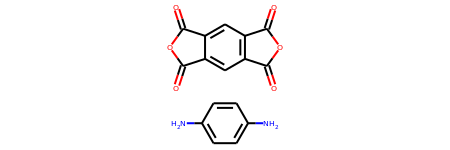

In [45]:
importlib.reload(retro)
retro.sg_depolymerize(mol2,polymer_linkage,retro.sg_rxns['[#6R0](=O)([OH])[C,c][C,c][CR1](=O)[NR1]'][0])[0]

In [39]:
retro.retrosynthesize([lps[4].SMILES],ro=False,radion=False,ox=False)